# Kmeans with Local Expension
___

In [1]:
from utils.utils import *
from utils.visualization import *
from utils.communities_network import *
from utils.iterative_greedy_algorithm import IG
from utils.kmeans import * 
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import time

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
output_animation_path = "output/animations"
algorithms_trace = []

## Test

### 1.1 Dolphins

In [4]:

file_path = 'data/reel/dolphins/dolphins.gml'
G = nx.read_gml(file_path, label='id')
original_nodes = list(G.nodes())
mapping = {node: i for i, node in enumerate(G.nodes())}
G = nx.relabel_nodes(G, mapping)
adj_matrix = nx.to_numpy_array(G)
true_labels = read_community_labels_file_reel(
    'data/reel/dolphins/groundTruth.txt')
print(f"The graph contains {adj_matrix.shape[0]} nodes.")

The graph contains 62 nodes.


In [5]:

start_time = time.time()
Cmax, Qmax, Kbest , Labels , trace = local_expansion_kmeans(G, adj_matrix, 2, 16 , metric="QSim" )
end_time = time.time()


for item in trace:

    item["NMI"] = calc_nmi(true_labels, communities_to_labels(
        G, item["communities"], original_nodes))
    
new_methode_time = end_time - start_time
new_methode_modularity = Qmax
new_methode_nmi = trace[Kbest-2]["NMI"]
new_methode_nb_communities = len(Cmax)

algorithms_trace.append({"name": "new_methode", "duration": new_methode_time , "modularity":new_methode_modularity, "nmi":new_methode_nmi, "nb_communities":new_methode_nb_communities})

custom_df_styling(trace)

[0, 1]


[0, 1, 9]
[0, 1, 9, 4]
[0, 1, 9, 4, 18]
[0, 1, 9, 4, 18, 2]
[0, 1, 9, 4, 18, 2, 30]
[0, 1, 9, 4, 18, 2, 30, 11]
No more nodes to select , k is too large


K,Modularity,NMI
2,0.140392,0.533428
3,0.128169,0.475301
4,0.175517,0.394625
5,0.197174,0.366448
6,0.168536,0.346030
7,0.163304,0.301466
8,0.160852,0.298189


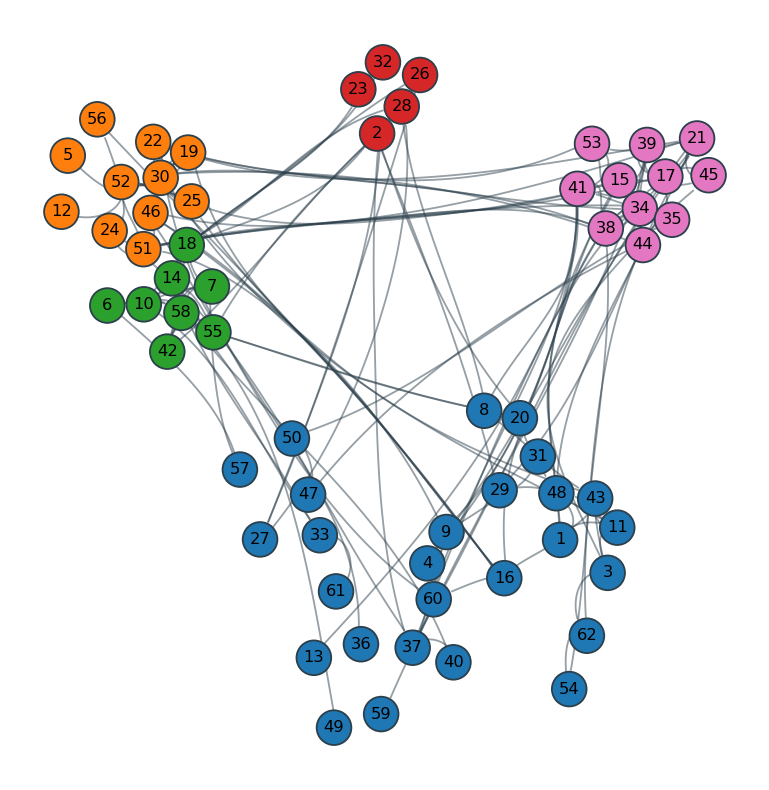

In [45]:
from netgraph import Graph


community_to_color = {
    0: 'tab:blue',
    1: 'tab:red',
    2: 'tab:orange',
    3: 'tab:green',
    4: 'tab:pink',

}
node_color = {node: community_to_color[community_id]
              for node, community_id in partion.items()}

plt.figure(figsize=(10, 10))
Graph(G,
      node_color=node_color, node_edge_width=.5, edge_alpha=.5, edge_width=.5,
      node_layout='community', node_layout_kwargs=dict(node_to_community=partion),
      edge_layout='bundled', edge_layout_kwargs=dict(k=2000), node_labels=node_labels, node_size=5, scale=(1.6, 1.6)
      )

plt.show()

In [44]:
partion = {node: comm-1 for node,
           comm in communities_to_labels(G, Cmax, original_nodes)}
node_labels = {node: f"{node+1}" for node, comm in partion.items()}

The animation GIF is saved in output/animations/dolphins.gif


MovieWriter ffmpeg unavailable; using Pillow instead.


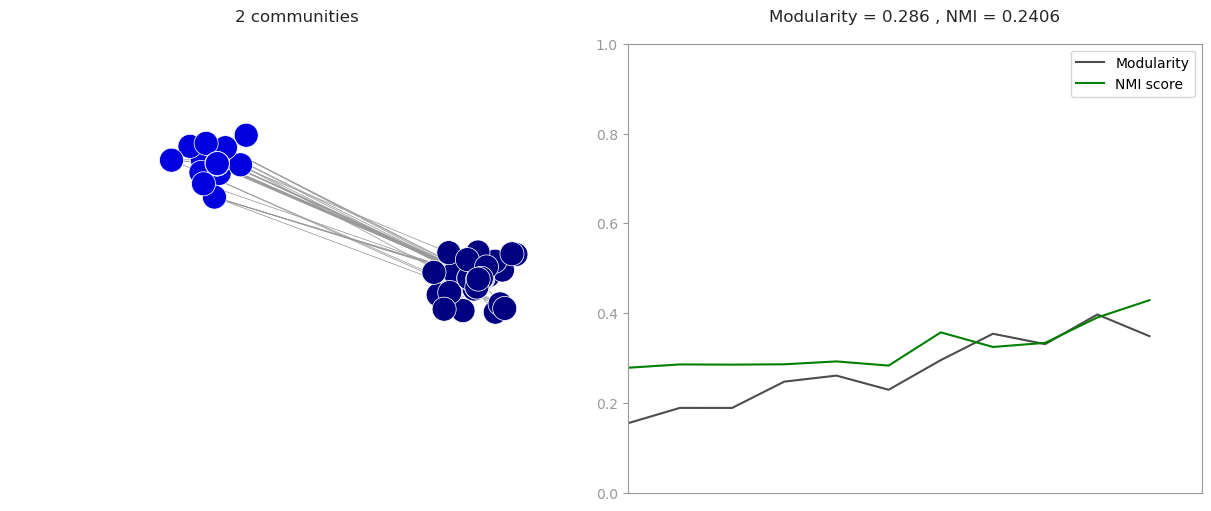

In [107]:

x = clusters_animation(adj_matrix, trace[::-1],dark=False,duration=20,filename=f"{output_animation_path}/dolphins.gif" ,  dpi = 200)

#### Iterated Greedy

In [5]:

start_time = time.time()
communitites, modularity_trace, _, _ = IG(adj_matrix, 15, 0.5)
end_time = time.time()

ig_nmi = calc_nmi(true_labels,communities_to_labels(G,communitites,original_nodes))
ig_mod = modularity_trace[-1]
ig_time = end_time - start_time
ig_nb_communities = len(communitites)

algorithms_trace.append({"name": "IG", "duration":ig_time , "modularity":ig_mod, "nmi":ig_nmi, "nb_communities":ig_nb_communities})

NameError: name 'adj_matrix' is not defined

#### Louvain

In [4]:
start = time.time()
partition , mod = louvain(G) 
end = time.time()

louvain_nmi = calc_nmi(true_labels, partition.items())
louvain_time = end - start
louvain_mod = mod
louvain_nb_communities = len(set(partition.values()))

algorithms_trace.append({"name": "Louvain", "duration":louvain_time , "modularity":louvain_mod, "nmi":louvain_nmi, "nb_communities":louvain_nb_communities})


NameError: name 'G' is not defined

In [110]:
start_time = time.time()
Cmax, Qmax, Kbest, Labels, trace = kmeans_random(G, adj_matrix, 2, 20)

end_time = time.time()


for item in trace:
    item["NMI"] = calc_nmi(true_labels, communities_to_labels(
        G, item["communities"], original_nodes))

kmeans_time = end_time - start_time
kmeans_modularity = Qmax
kmeans_nmi = trace[Kbest-2]["NMI"]
kmeans_nb_communities = len(Cmax)

algorithms_trace.append({"name": "Kmeans", "duration":kmeans_time , "modularity":kmeans_modularity, "nmi":kmeans_nmi, "nb_communities":kmeans_nb_communities})

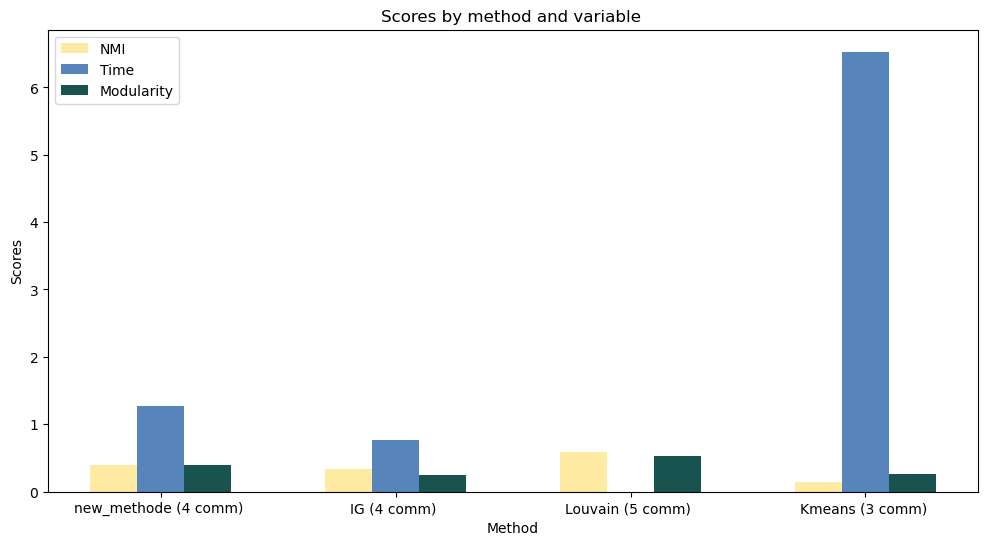

In [111]:
# Sample data
n_groups = len(algorithms_trace)
# NMI for Louvain, IG, New Method
nmi = [algo["nmi"] for algo in algorithms_trace]
# Time for Louvain, IG, New Method
duration = [algo["duration"] for algo in algorithms_trace]
# Modularity for Louvain, IG, New Method
modularity = [algo["modularity"] for algo in algorithms_trace]

# Create plot

fig, ax = plt.subplots(figsize=(12, 6))

index = np.arange(n_groups)
bar_width = 0.2


rects1 = plt.bar(index, nmi, bar_width,
                 color='#FEEAA1',
                 label='NMI')

rects2 = plt.bar(index + bar_width, duration, bar_width,
                 color='#5784BA',
                 label='Time')

rects3 = plt.bar(index + 2 * bar_width, modularity, bar_width,
                 color='#18534F',
                 label='Modularity')



plt.xlabel('Method')
plt.ylabel('Scores')
plt.title('Scores by method and variable ')


plt.xticks(index + bar_width, [f"{algo['name']} ({algo['nb_communities']} comm) " for algo in algorithms_trace])

plt.legend()
plt.show()

___

In [8]:
algorithms_trace = []

### 1.2 Karate

In [4]:

file_path = 'data/reel/karate/karate.gml'
G = nx.read_gml(file_path, label='id')
original_nodes = list(G.nodes())
mapping = {node: i for i, node in enumerate(G.nodes())}
G = nx.relabel_nodes(G, mapping)
adj_matrix = nx.to_numpy_array(G)
true_labels = read_community_labels_file_reel(
    'data/reel/karate/groundTruth.txt')
print(f"The graph contains {adj_matrix.shape[0]} nodes.")

The graph contains 34 nodes.


In [8]:
PCA_reduction(distance_matrix2(similarity_matrix(adj_matrix)))

array([[-1.22657952e+00, -2.14598724e-01,  1.13904574e+00,
         3.36353084e-01,  1.30810350e+00, -5.02554186e-01],
       [-1.42990432e+00,  3.56616703e-01,  6.89565537e-01,
         2.52384471e-02,  4.78782714e-02,  1.22072591e-01],
       [-7.91733826e-01,  1.30022336e+00, -1.93559587e-01,
         1.08727496e+00, -4.84814764e-03, -2.89231716e-01],
       [-1.53148761e+00,  6.54032386e-01,  5.16645355e-01,
        -2.82096376e-02, -2.07599917e-01, -3.22072201e-01],
       [-1.46443993e+00, -3.92227600e-01, -5.32702777e-01,
        -1.36834736e-01,  2.95658956e-01,  2.76628485e-01],
       [-1.52893885e+00, -3.76451965e-01, -5.78380927e-01,
        -1.51825872e-01,  4.35089886e-01,  3.70878282e-01],
       [-1.52893885e+00, -3.76451965e-01, -5.78380927e-01,
        -1.51825872e-01,  4.35089886e-01,  3.70878282e-01],
       [-1.61008366e+00,  7.84400123e-01,  4.44259294e-01,
        -1.64468606e-01, -3.33000449e-01, -1.94923721e-01],
       [ 8.39003196e-01,  1.49418556e+00,  7.336

In [5]:

start_time = time.time()
Cmax, Qmax, Kbest, Labels, trace = local_expansion_kmeans(G, adj_matrix, 2, 2 , metric="QSim")
end_time = time.time()


for item in trace:
    item["NMI"] = calc_nmi(true_labels, communities_to_labels(
        G, item["communities"], original_nodes))


new_methode_time = end_time - start_time
new_methode_modularity = Qmax
new_methode_nmi = trace[Kbest-2]["NMI"]
new_methode_nb_communities = len(Cmax)


algorithms_trace.append({"name": "new_methode", "duration": new_methode_time, "modularity": new_methode_modularity,
                        "nmi": new_methode_nmi, "nb_communities": new_methode_nb_communities})


custom_df_styling(trace) 

Iteration  0
M =  0
Unselected Nodes
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}
Cliques
[{'nodes': [0, 1, 17], 'weight': 0.6018518518518519}, {'nodes': [0, 1, 2, 3, 13], 'weight': 0.5041666666666667}, {'nodes': [0, 1, 2, 3, 7], 'weight': 0.4741666666666666}, {'nodes': [0, 1, 19], 'weight': 0.6574074074074074}, {'nodes': [0, 1, 21], 'weight': 0.6018518518518519}, {'nodes': [0, 4, 10], 'weight': 0.625}, {'nodes': [0, 4, 6], 'weight': 0.6666666666666666}, {'nodes': [0, 5, 10], 'weight': 0.6666666666666666}, {'nodes': [0, 5, 6], 'weight': 0.625}, {'nodes': [0, 8, 2], 'weight': 0.7208333333333332}, {'nodes': [0, 12, 3], 'weight': 0.6041666666666666}, {'nodes': [2, 32, 8], 'weight': 0.7277777777777779}, {'nodes': [5, 16, 6], 'weight': 0.5833333333333334}, {'nodes': [33, 32, 8, 30], 'weight': 0.5855392156862745}, {'nodes': [33, 32, 14], 'weight': 0.5727124183006536}, {'nodes': [33, 32, 15], 'weight': 0.5727124

K,Modularity,NMI
2,0.210634,1.000000


The animation GIF is saved in output/animations/karate.gif


MovieWriter ffmpeg unavailable; using Pillow instead.


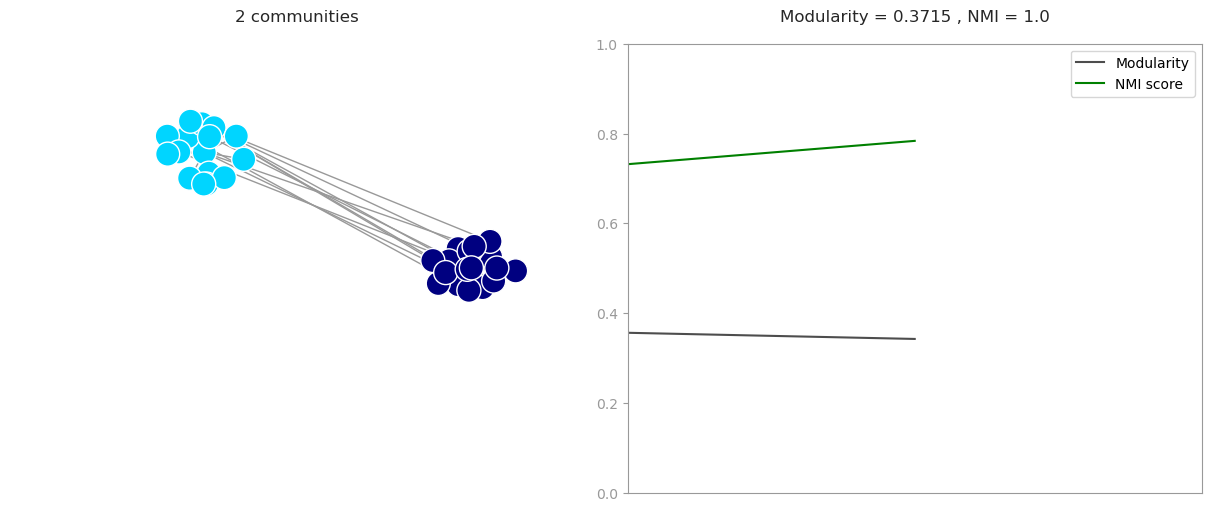

In [116]:

x = clusters_animation(adj_matrix, trace[::-1], dark=False,duration=20,filename=f"{output_animation_path}/karate.gif" ,  dpi = 200)

In [117]:
Cmax

[[0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21],
 [8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]]

In [6]:
partion = {node-1: comm-1 for node,
           comm in communities_to_labels(G, Cmax, original_nodes)}
node_labels = {node: f"{node+1}" for node, comm in partion.items()}

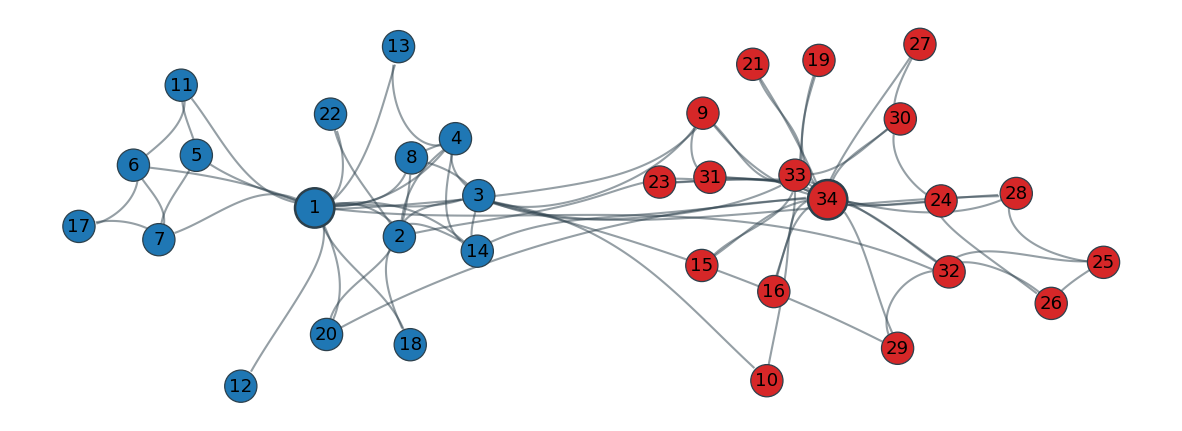

In [13]:
from netgraph import Graph



centroid = [0,33]

community_to_color = {
    0: 'tab:blue',
    1: 'tab:red',

}

node_size = {node : 4 if node not in centroid else 5 for node , comm in partion.items()}

node_edge_width = {node : 0.3 if node not in centroid else .6 for node , comm in partion.items()}

node_color = {node: community_to_color[community_id]
              for node, community_id in partion.items()}



plt.figure(figsize=(15, 15))
Graph(
    G,
    node_color=node_color, node_edge_width=node_edge_width, edge_alpha=.5, edge_width=.5,
        node_layout='community', node_layout_kwargs=dict(node_to_community=partion),
        edge_layout='bundled', edge_layout_kwargs=dict(k=2000) , node_labels= node_labels,node_size=node_size ,scale =( 1.6,1.6)
    )
plt.show()

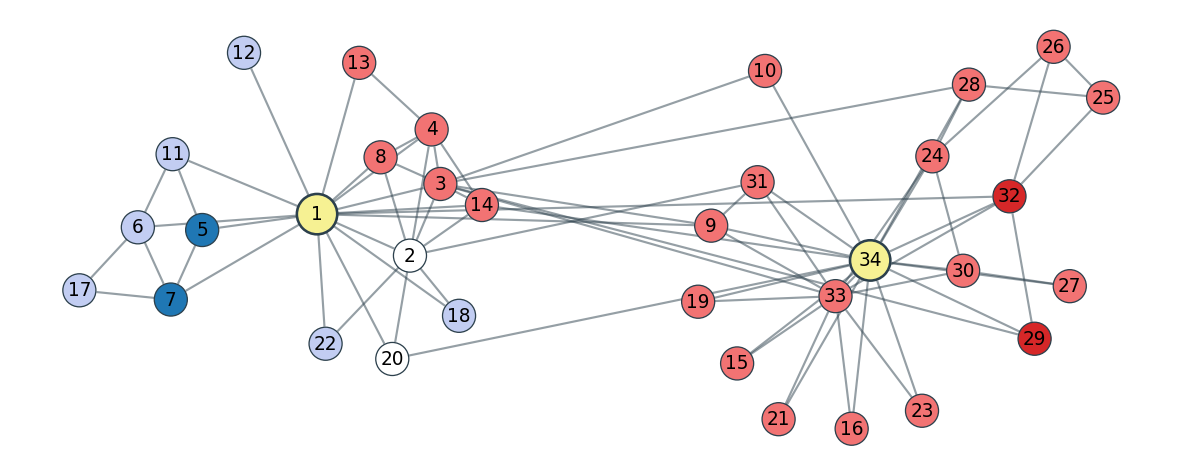

In [83]:
from netgraph import Graph


centroid_red = 33
centroid = [33,0]
centroid_blue = 0

added_nodes_red = [32 ,8, 9, 13, 27, 2, 23, 3,
                   7, 14, 15, 18, 20, 22, 24, 26, 29, 30, 12, 25]
added_nodes_blue = [ 5, 10, 11, 16, 17, 21]
# added_nodes_blue = []

nodes_red = [ 28, 31] 

nodes_blue = [ 4, 6]


community_to_color = {

}

node_size = {node: 4 if node not in centroid else 5 for node,
             comm in partion.items()}

node_edge_width = {
    node: 0.3 if node not in centroid else .6 for node, comm in partion.items()}

node_color = dict()
for node , comm in partion.items():
    if node in added_nodes_red:
        node_color[node] = "#f27373"
    elif node in added_nodes_blue : 
        node_color[node] = "#c2cdf2"
    elif node in nodes_red :
        node_color[node] = "tab:red"
    elif node in  [centroid_red,centroid_blue]:
        node_color[node] = "#F6F193"
    elif node in nodes_blue:
        node_color[node] = "tab:blue"
    else : 
        node_color[node] = community_to_color.get(node, "#fff")


# node_color = {node: community_to_color.get(node, "#fff") if node not in added_nodes else "#f27373"
#               for node, community_id in partion.items()}


plt.figure(figsize=(15, 15))
Graph(
    G,
    node_color=node_color, node_edge_width=node_edge_width, edge_alpha=.5, edge_width=.5,
    node_layout='community', node_layout_kwargs=dict(node_to_community=partion),
     node_labels=node_labels, node_size=node_size, scale=(1.6, 1.6)
)
plt.show()

#### Iterated Greedy

In [124]:

start_time = time.time()
communitites, modularity_trace, _, _ = IG(adj_matrix, 15, 0.5)
end_time = time.time()

ig_nmi = calc_nmi(true_labels, communities_to_labels(
    G, communitites, original_nodes))
ig_mod = modularity_trace[-1]
ig_time = end_time - start_time
ig_nb_communities = len(communitites)

algorithms_trace.append({"name": "IG", "duration": ig_time , "modularity":ig_mod, "nmi":ig_nmi, "nb_communities":ig_nb_communities})

IG:   0%|          | 0/15 [00:00<?, ?it/s]

#### louvain

In [125]:
start = time.time()
partition, mod = louvain(G)
end = time.time()

louvain_nmi = calc_nmi(true_labels, partition.items())
louvain_time = end - start
louvain_mod = mod
louvain_nb_communities = len(set(partition.values()))

algorithms_trace.append({"name": "Louvain", "duration": louvain_time, "modularity": louvain_mod,
                        "nmi": louvain_nmi, "nb_communities": louvain_nb_communities})

#### kmeans_random

In [126]:
start_time = time.time()
Cmax, Qmax, Kbest, Labels, trace = kmeans_random(G, adj_matrix, 2, 20)

end_time = time.time()


for item in trace:
    item["NMI"] = calc_nmi(true_labels, communities_to_labels(
        G, item["communities"], original_nodes))

kmeans_time = end_time - start_time
kmeans_modularity = Qmax
kmeans_nmi = trace[Kbest-2]["NMI"]
kmeans_nb_communities = len(Cmax)

algorithms_trace.append({"name": "Kmeans", "duration": kmeans_time , "modularity":kmeans_modularity, "nmi":kmeans_nmi, "nb_communities":kmeans_nb_communities})

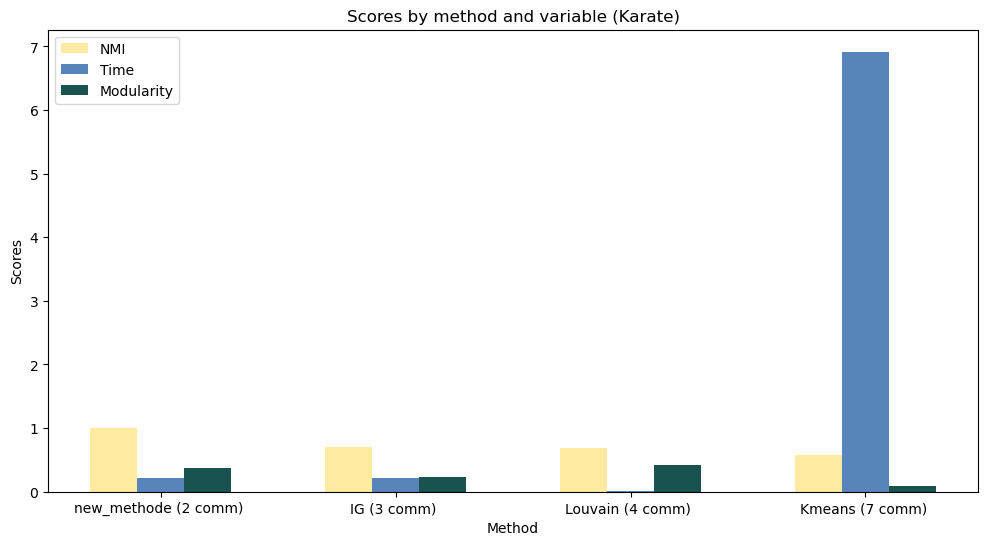

In [127]:
# Sample data
n_groups = len(algorithms_trace)
# NMI for Louvain, IG, New Method
nmi = [algo["nmi"] for algo in algorithms_trace]
# Time for Louvain, IG, New Method
duration = [algo["duration"] for algo in algorithms_trace]
# Modularity for Louvain, IG, New Method
modularity = [algo["modularity"] for algo in algorithms_trace]

# Create plot

fig, ax = plt.subplots(figsize=(12, 6))

index = np.arange(n_groups)
bar_width = 0.2


rects1 = plt.bar(index, nmi, bar_width,
                 color='#FEEAA1',
                 label='NMI')

rects2 = plt.bar(index + bar_width, duration, bar_width,
                 color='#5784BA',
                 label='Time')

rects3 = plt.bar(index + 2 * bar_width, modularity, bar_width,
                 color='#18534F',
                 label='Modularity')


plt.xlabel('Method')
plt.ylabel('Scores')
plt.title('Scores by method and variable (Karate)')


plt.xticks(index + bar_width,
           [f"{algo['name']} ({algo['nb_communities']} comm) " for algo in algorithms_trace])

plt.legend()
plt.show()

___

### Football


In [4]:

file_path = 'data/reel/football/football.gml'
G = nx.read_gml(file_path, label='id')
original_nodes = list(G.nodes())
mapping = {node: i for i, node in enumerate(G.nodes())}
G = nx.relabel_nodes(G, mapping)
adj_matrix = nx.to_numpy_array(G)
true_labels = read_community_labels_file_reel(
    'data/reel/football/groundTruth.txt')
print(f"The graph contains {adj_matrix.shape[0]} nodes.")

The graph contains 115 nodes.


In [6]:

start_time = time.time()
Cmax, Qmax, Kbest, Labels, trace = local_expansion_kmeans(G, adj_matrix, 2, 16 , metric="QSim" )
end_time = time.time()


for item in trace:
    item["NMI"] = calc_nmi(true_labels, communities_to_labels(
        G, item["communities"], original_nodes))


new_methode_time = end_time - start_time
new_methode_modularity = Qmax
new_methode_nmi = trace[Kbest-2]["NMI"]
new_methode_nb_communities = len(Cmax)


algorithms_trace.append({"name": "new_methode", "duration": new_methode_time, "modularity": new_methode_modularity,
                        "nmi": new_methode_nmi, "nb_communities": new_methode_nb_communities})


custom_df_styling(trace)

[0, 64]
[0, 64, 72]
[0, 64, 72, 97]
[0, 64, 72, 97, 68]
[0, 64, 72, 97, 68, 67]
[0, 64, 72, 97, 68, 67, 96]
[0, 64, 72, 97, 68, 67, 96, 34]
[0, 64, 72, 97, 68, 67, 96, 34, 35]
[0, 64, 72, 97, 68, 67, 96, 34, 35, 37]
[0, 64, 72, 97, 68, 67, 96, 34, 35, 37, 48]
[0, 64, 72, 97, 68, 67, 96, 34, 35, 37, 48, 50]
[0, 64, 72, 97, 68, 67, 96, 34, 35, 37, 48, 50, 80]
[0, 64, 72, 97, 68, 67, 96, 34, 35, 37, 48, 50, 80, 82]
[0, 64, 72, 97, 68, 67, 96, 34, 35, 37, 48, 50, 80, 82, 14]
[0, 64, 72, 97, 68, 67, 96, 34, 35, 37, 48, 50, 80, 82, 14, 23]


K,Modularity,NMI
2,0.184177,0.390388
3,0.226598,0.520160
4,0.219524,0.606939
5,0.224625,0.684325
6,0.256304,0.723576
7,0.276426,0.800200
8,0.293242,0.858061
9,0.296268,0.891930
10,0.300315,0.915932
11,0.301504,0.943843


### Synth Dataset

#### LRF 015

In [128]:

file_path = 'data/synth/LFR/0.15/network.dat'
G = nx.read_edgelist(file_path, nodetype=int)
original_nodes = list(G.nodes())
mapping = {node: i for i, node in enumerate(G.nodes())}
G = nx.relabel_nodes(G, mapping)
adj_matrix = nx.to_numpy_array(G)
adj_matrix.shape[0]

128

In [129]:
true_communities = read_community_labels_file_synth("data/synth/LFR/0.15/community.dat" )

In [130]:
Cmax, Qmax, Kbest, Labels, trace = local_expansion_kmeans(G, adj_matrix, 2, 7 )

In [131]:
for item in trace:
    item["NMI"] = calc_nmi(true_communities, communities_to_labels(
        G, item["communities"], original_nodes))


custom_df_styling(trace)

K,Modularity,NMI
2,0.302734,0.577160
3,0.504883,0.857143
4,0.601562,1.000000
5,0.493042,0.942591
6,0.392334,0.890290
7,0.288696,0.843488


The animation GIF is saved in output/animations/LRF015.gif


MovieWriter ffmpeg unavailable; using Pillow instead.


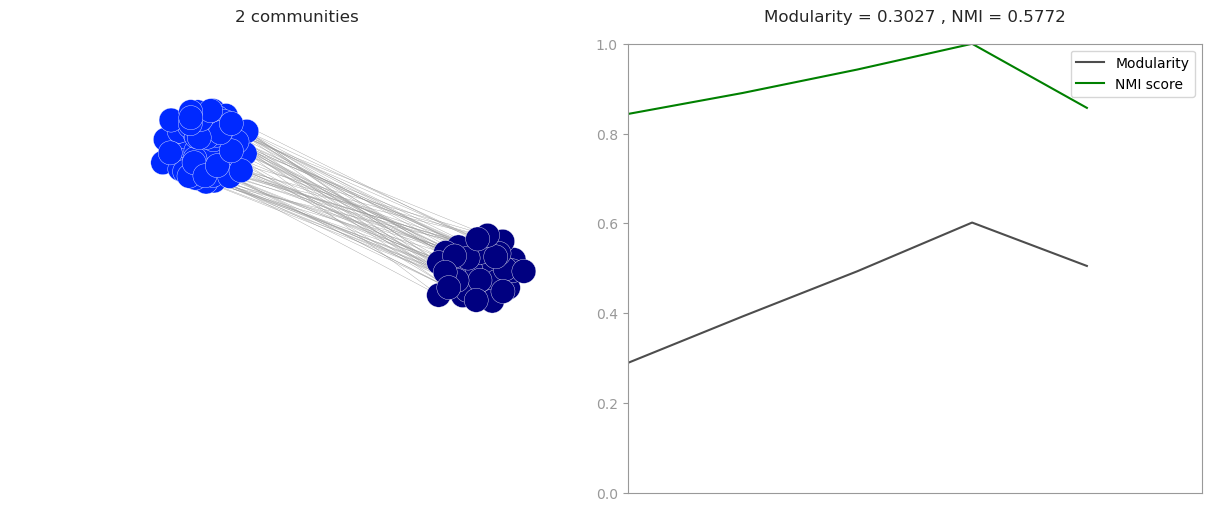

In [132]:
x = clusters_animation(adj_matrix, trace[::-1], dark=False, duration=20,filename=f"{output_animation_path}/LRF015.gif" ,  dpi = 200)

___

#### LRF040

In [ ]:

file_path = 'data/synth/LFR/0.40/network.dat'
G = nx.read_edgelist(file_path, nodetype=int)
original_nodes = list(G.nodes())
mapping = {node: i for i, node in enumerate(G.nodes())}
G = nx.relabel_nodes(G, mapping)
adj_matrix = nx.to_numpy_array(G)
adj_matrix.shape[0]

128

In [134]:
true_communities = read_community_labels_file_synth(
    "data/synth/LFR/0.40/community.dat")

In [ ]:
Cmax, Qmax, Kbest, Labels, trace = local_expansion_kmeans(G, adj_matrix, 2, 7)

In [136]:
for item in trace:
    item["NMI"] = calc_nmi(true_communities, communities_to_labels(
        G, item["communities"], original_nodes))


custom_df_styling(trace)

K,Modularity,NMI
2,0.240234,0.599793
3,0.295776,0.831004
4,0.347656,1.000000
5,0.292969,0.943706
6,0.218384,0.870775
7,0.195557,0.828482


The animation GIF is saved in output/animations/LRF040.gif


MovieWriter ffmpeg unavailable; using Pillow instead.


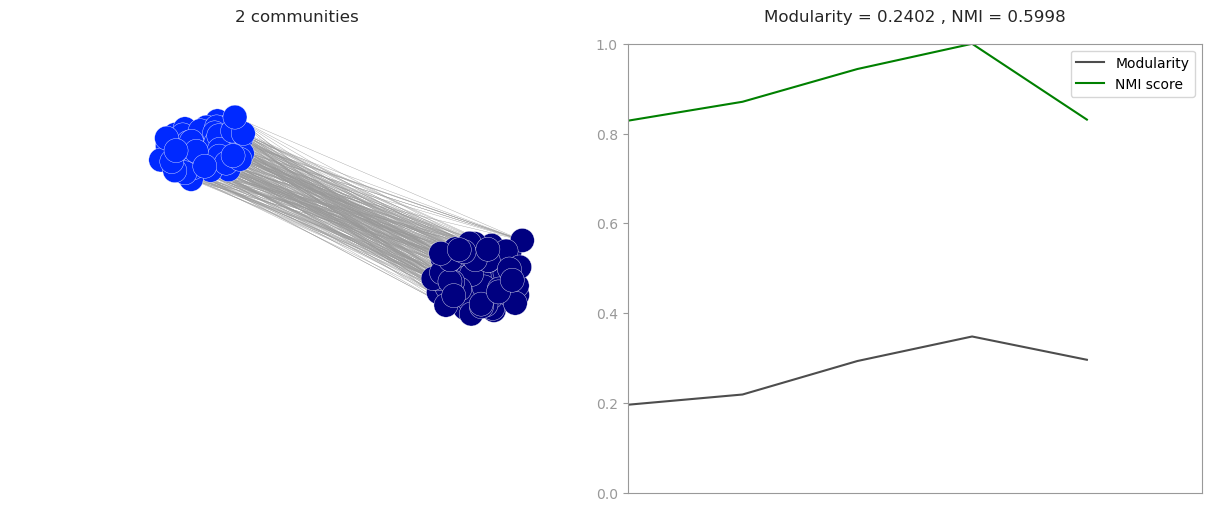

In [137]:
x = clusters_animation(adj_matrix, trace[::-1], dark=False, duration=20, filename=f"{output_animation_path}/LRF040.gif" ,  dpi = 200)

___

#### LRF050

In [138]:

file_path = 'data/synth/LFR/0.50/network.dat'
G = nx.read_edgelist(file_path, nodetype=int)
original_nodes = list(G.nodes())
mapping = {node: i for i, node in enumerate(G.nodes())}
G = nx.relabel_nodes(G, mapping)
adj_matrix = nx.to_numpy_array(G)
adj_matrix.shape[0]

128

In [139]:
true_communities = read_community_labels_file_synth(
    "data/synth/LFR/0.50/community.dat")

In [140]:
Cmax, Qmax, Kbest, Labels, trace = local_expansion_kmeans(G, adj_matrix, 2, 7)

In [141]:
for item in trace:
    item["NMI"] = calc_nmi(true_communities, communities_to_labels(
        G, item["communities"], original_nodes))


custom_df_styling(trace)

K,Modularity,NMI
2,-0.121094,0.036575
3,-0.091309,0.155362
4,-0.045776,0.123433
5,-0.051880,0.125205
6,-0.045776,0.165747
7,-0.027588,0.227866


The animation GIF is saved in output/animations/LRF040.gif


MovieWriter ffmpeg unavailable; using Pillow instead.


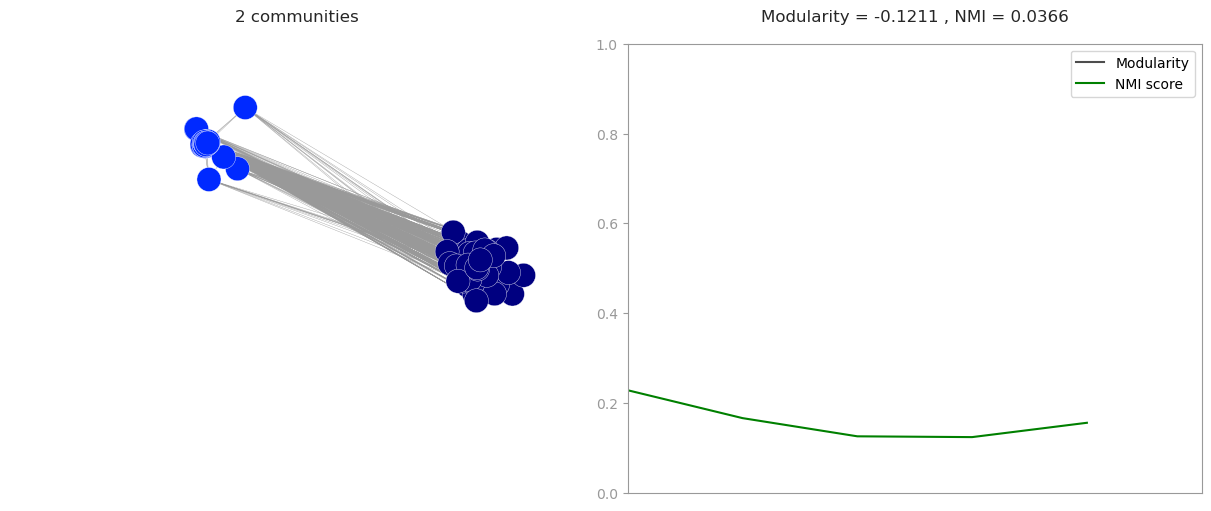

In [142]:
x = clusters_animation(adj_matrix, trace[::-1], dark=False, duration=20,
                       filename=f"{output_animation_path}/LRF040.gif",  dpi=200)

In [143]:

file_path = 'data/synth/LFR/0.50/network.dat'
G = nx.read_edgelist(file_path, nodetype=int)
original_nodes = list(G.nodes())
mapping = {node: i for i, node in enumerate(G.nodes())}
G = nx.relabel_nodes(G, mapping)
adj_matrix = nx.to_numpy_array(G)
adj_matrix.shape[0]


true_communities = read_community_labels_file_synth(
    "data/synth/LFR/0.50/community.dat")

In [144]:
Cmax, Qmax, Kbest, Labels, trace = local_expansion_kmeans(G, adj_matrix, 2, 7 , metric="QSim")

In [145]:
for item in trace:
    item["NMI"] = calc_nmi(true_communities, communities_to_labels(
        G, item["communities"], original_nodes))


custom_df_styling(trace)

K,Modularity,NMI
2,-0.056641,0.036575
3,-0.041748,0.155362
4,-0.018982,0.123433
5,-0.022034,0.125205
6,-0.018982,0.165747
7,-0.009888,0.227866


In [146]:
Cmax, Qmax, Kbest, Labels, trace = local_expansion_kmeans(
    G, adj_matrix, 2, 7)

In [148]:
partion = {node-1: comm-1 for node,
           comm in communities_to_labels(G, Cmax, original_nodes)}
node_labels = {node: f"{node+1}" for node, comm in partion.items()}

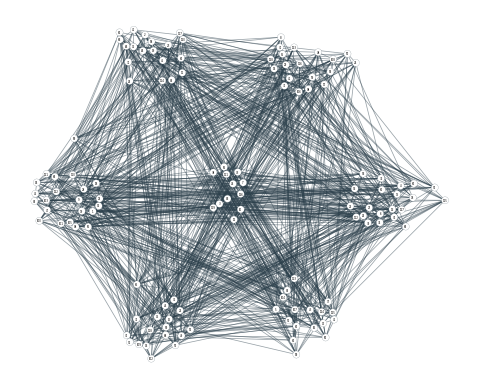

In [160]:
from netgraph import EditableGraph


community_to_color = {
    0: 'tab:blue',
    1: 'tab:orange',
    2: 'tab:red',
    3: 'tab:pink',
    4: 'tab:green',
    5: 'tab:blue',
    6: 'tab:black',

}
node_color = {node: community_to_color[community_id]
              for node, community_id in partion.items()}

Graph(G,
       node_edge_width=.2, edge_alpha=.5,
      node_layout='community', node_layout_kwargs=dict(node_to_community=partion),
       node_labels=node_labels, node_size=5, scale=(5, 5)
      )

plt.show()